In [1]:
#data ingestion
#EDA
#preprocessing
#model building
#evaluatoion

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("TSLA.csv")

In [4]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [5]:
data.shape

(758, 8)

In [6]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [7]:
data.head().T

,0,1,2,3,4
Date,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-28
Open,39.551998,39.82,38.868,39.966,38.240002
High,41.48,40.787998,39.894001,39.995998,39.0
Low,39.208,38.355999,37.243999,37.75,37.57
Close,41.015999,38.546001,39.098,38.125999,37.740002
Volume,90019500,93426000,132735500,70683000,51564500
Dividends,0,0,0,0,0
Stock Splits,0.0,0.0,0.0,0.0,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          758 non-null    object 
 1   Open          758 non-null    float64
 2   High          758 non-null    float64
 3   Low           758 non-null    float64
 4   Close         758 non-null    float64
 5   Volume        758 non-null    int64  
 6   Dividends     758 non-null    int64  
 7   Stock Splits  758 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 47.5+ KB


In [9]:
stock_data = data[["Date", "Close"]]

In [10]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [11]:
stock_data.info() #Date column is object, ideally it should be a date time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [12]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

In [13]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [14]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [15]:
#Time series data and tradition data>> the difference is time series has a time component
#Therefore date column should be index. 
#slicing of data on date columns becomes easy
#visulaisation is simple
#Libraries related to forecasting models assumes that there is a time/date column

In [16]:
stock_data = stock_data.set_index("Date")

In [17]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [18]:
#steps:
#step 1: summary>>mean, median, mode
#step 2> visualise the time series data, rolling mean and standard deviation, trend seasonalit and noise
#decomposition of time srries
#step 3>> stationarity check>> visualisation or statistical test(ADF)
#step 4:ACF and PACF
#step 5: Outliers


In [19]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


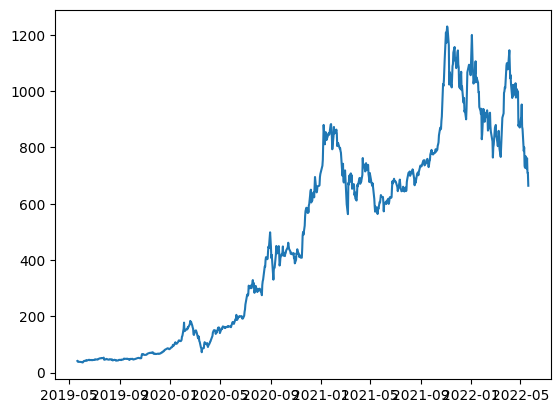

In [20]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

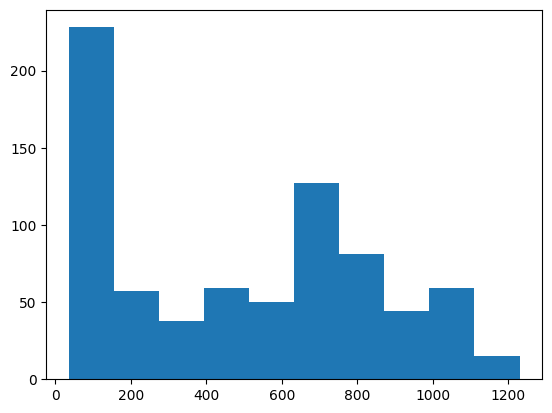

In [21]:
plt.hist(stock_data.Close)

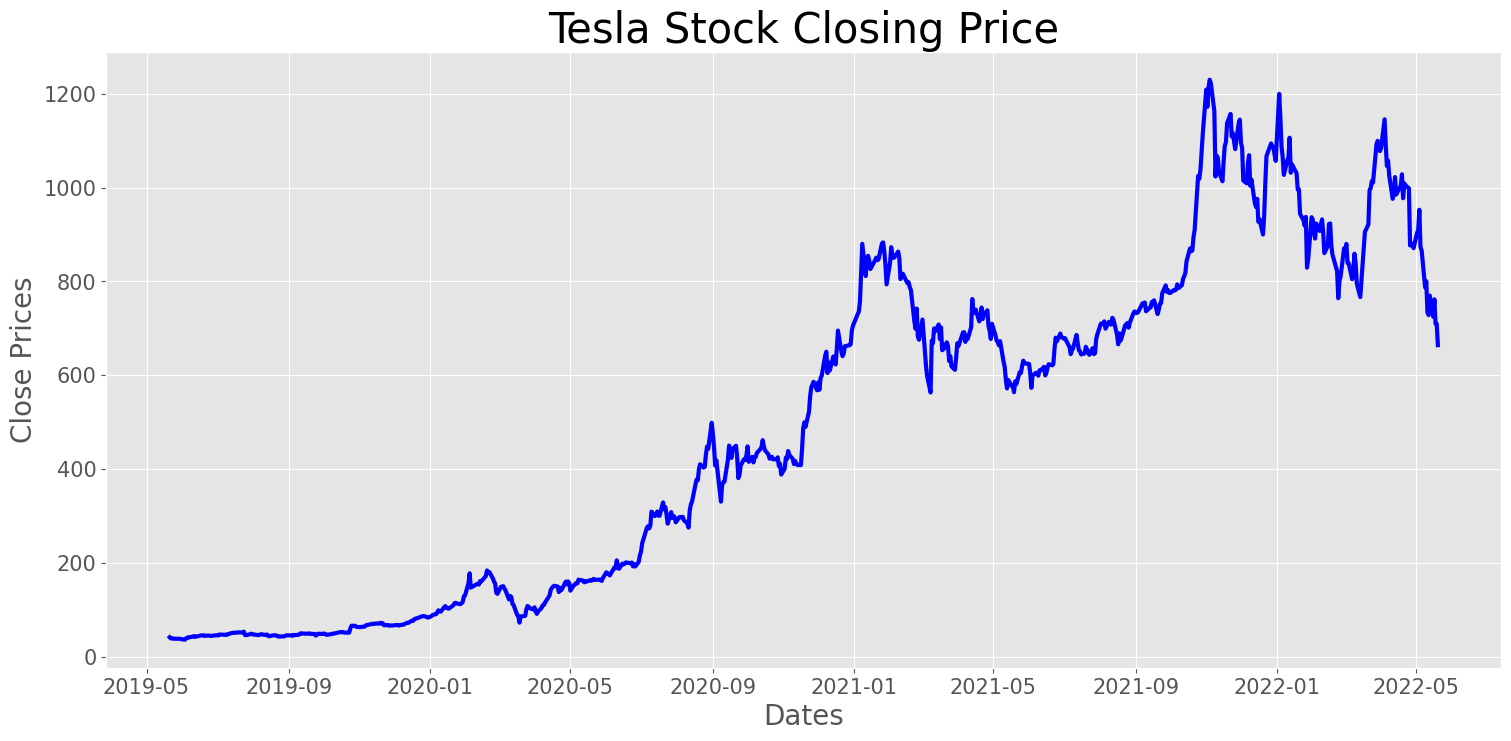

In [22]:
#line chart for closing price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

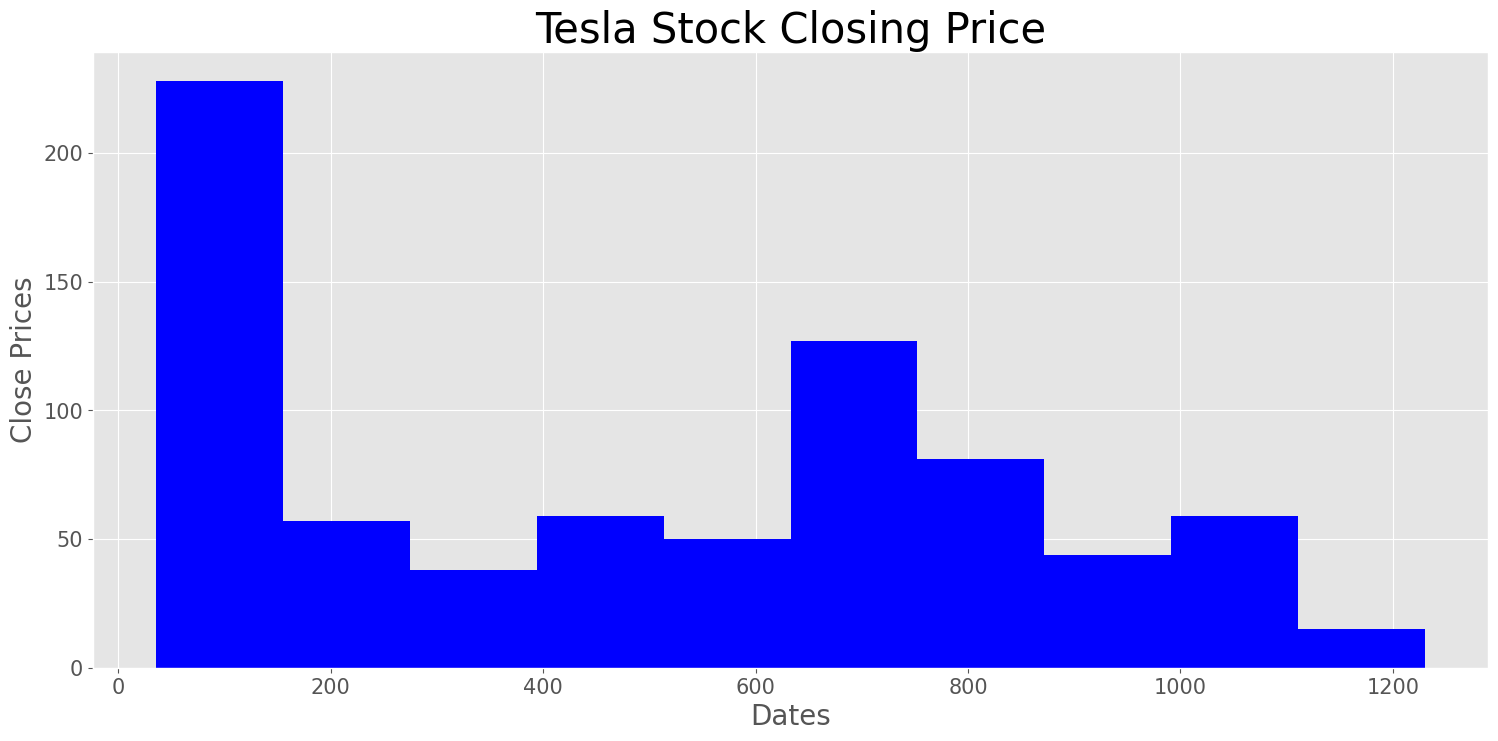

In [23]:
#histogram
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

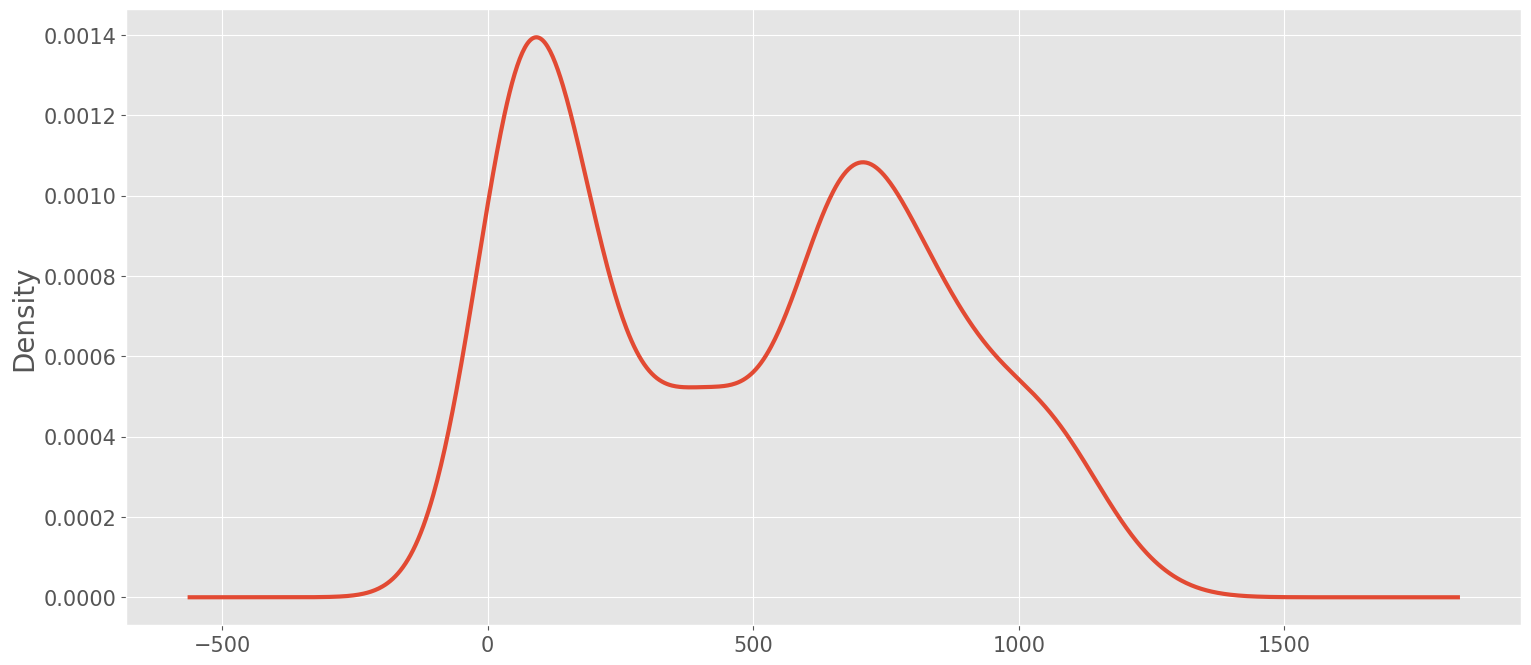

In [24]:
#distribution plot of closing price
df_close = stock_data["Close"]
df_close.plot(kind = 'kde', figsize = (18, 8), linewidth = 3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel("Density", fontsize = 20)
plt.yticks(fontsize=15)
plt.show()

In [25]:
rolling_mean = stock_data["Close"].rolling(48).mean()
rolling_std = stock_data["Close"].rolling(48).std()

In [26]:
rolling_std

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    113.126351
2022-05-17    115.404496
2022-05-18    119.124084
2022-05-19    121.840134
2022-05-20    125.615809
Name: Close, Length: 758, dtype: float64

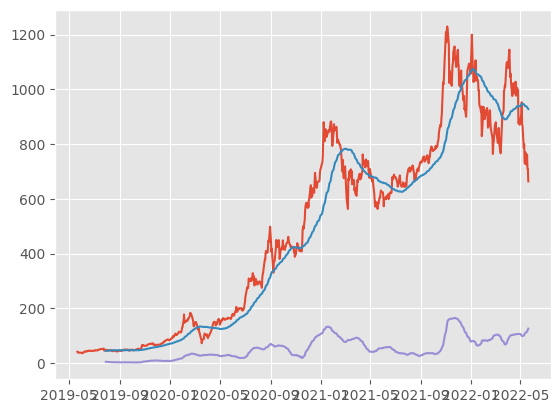

In [27]:
plt.plot(stock_data.Close)
plt.plot(rolling_mean)
plt.plot(rolling_std)

In [28]:
#From the plot above, it is clear that time series is non stationary
#lets reverify by statistical test as well > ADF test

In [31]:
# pip install statsmodels

In [32]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data["Close"])

In [ ]:
adft #null hypotheis of adf test is time series is non stationary, pvalue<0.05, reject null hypothesis
#here pvalue> 0.05, it means series is non stationary

(-1.3630085817037487,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [ ]:
pd.Series(adft[0:4], index = ["test_statistics", "p-value", 'lag', 'no of data points'])

test_statistics       -1.363009
p-value                0.599876
lag                    9.000000
no of data points    748.000000
dtype: float64

In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


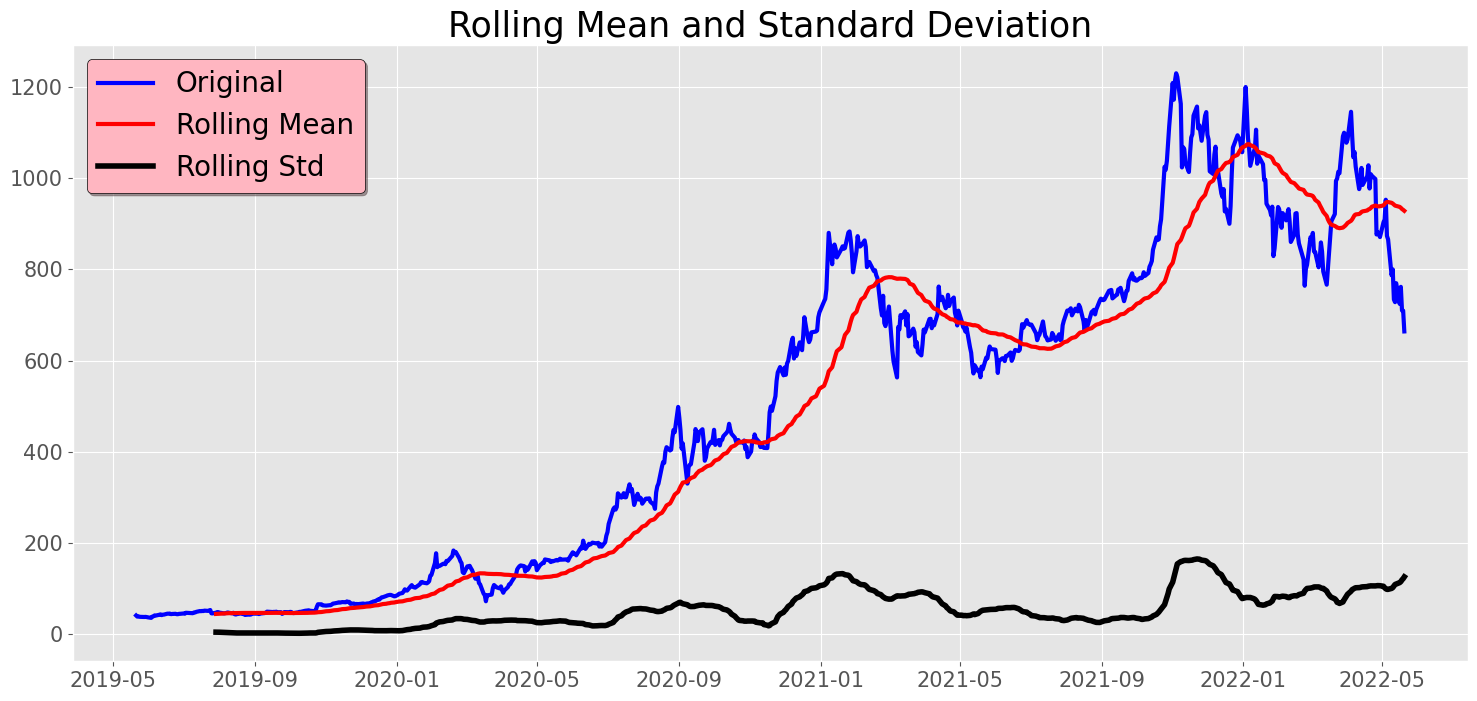

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [ ]:
test_stationarity(stock_data.Close)

In [ ]:
#series is non stationary

In [ ]:
#A time series is made up of level, trend, seasonalit, noise
#time series is of two types>> additive and multiplicative

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[['Close']], period = 12) #for 12 months

In [ ]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

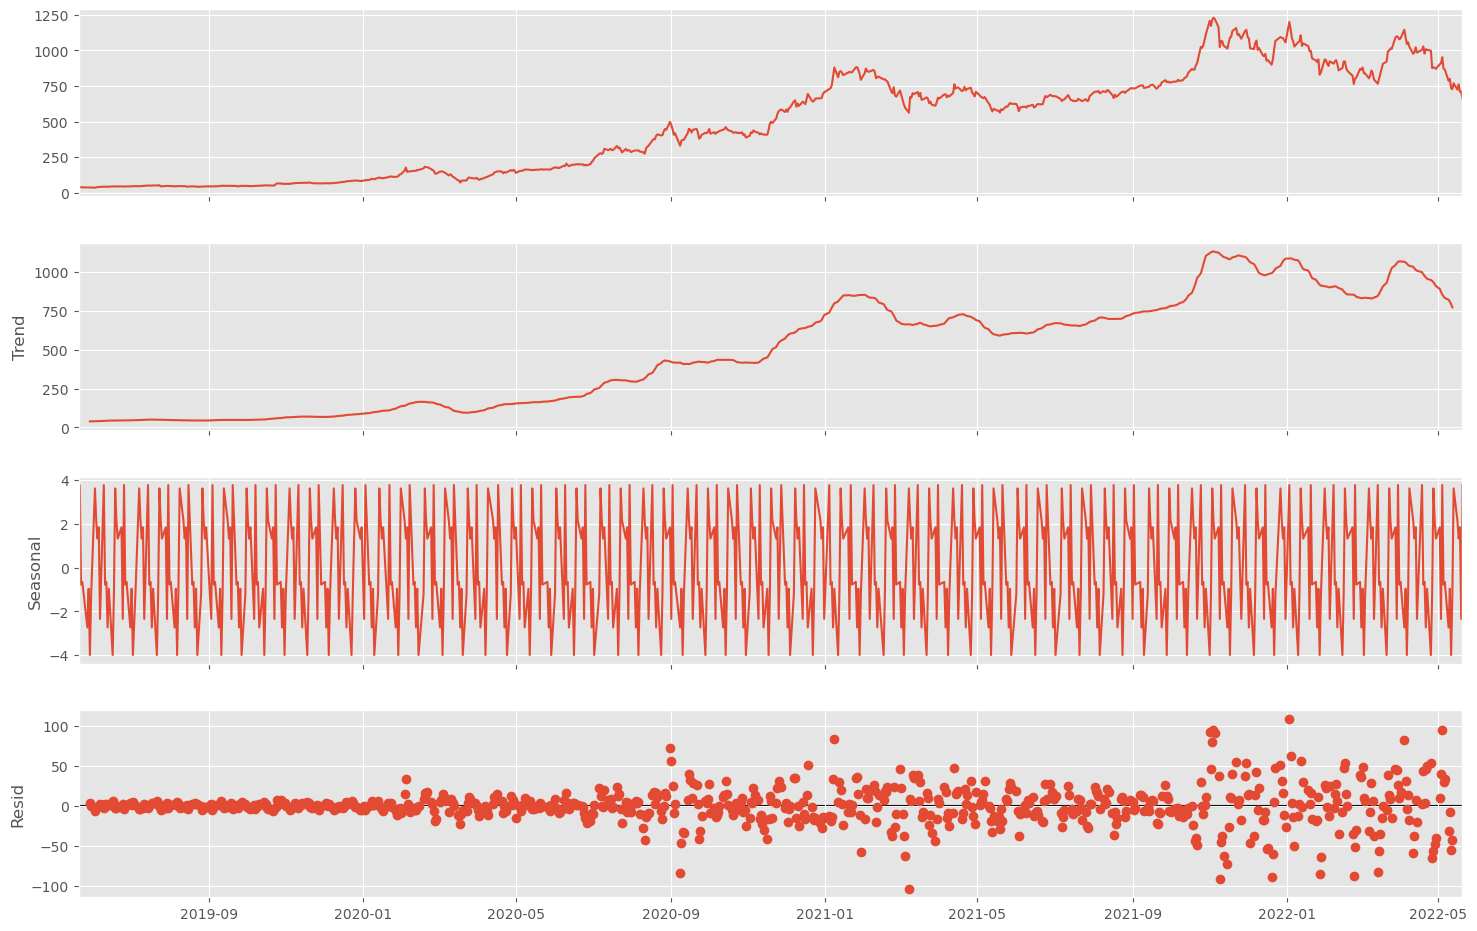

In [ ]:
fig = plt.figure(figsize = (20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)

<Figure size 2000x1000 with 0 Axes>

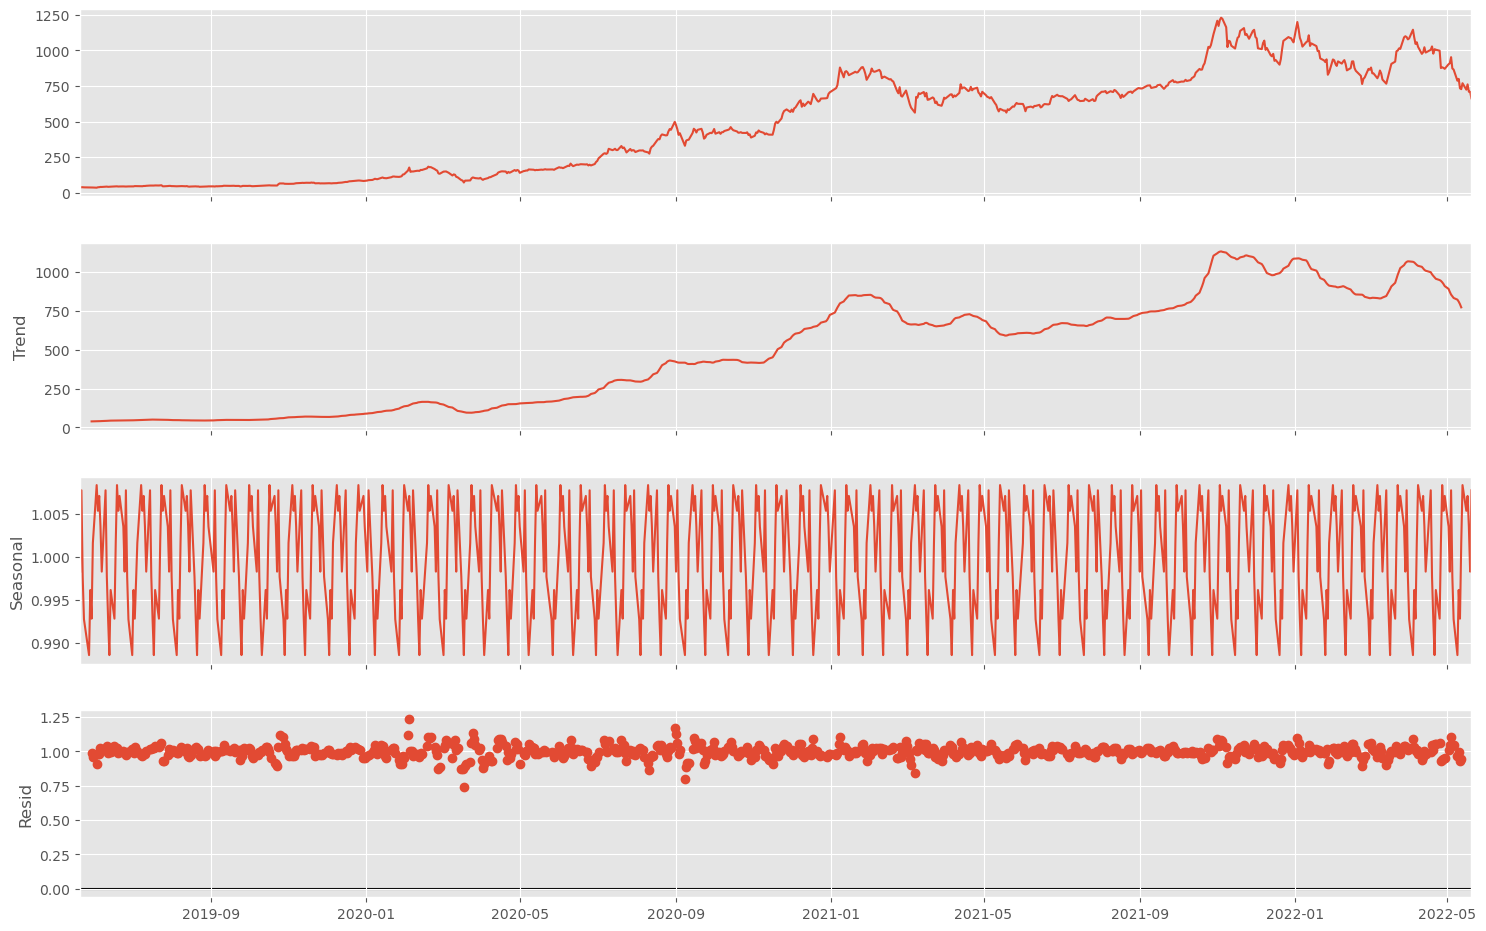

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[['Close']], period = 12, model = "mutiplicative")
fig = plt.figure(figsize = (20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)

<Axes: >

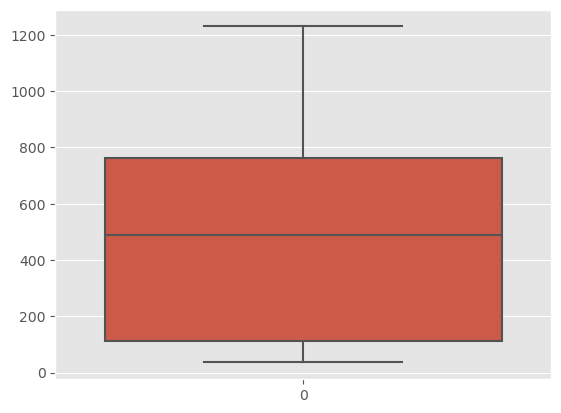

In [ ]:
sns.boxplot(stock_data.Close)

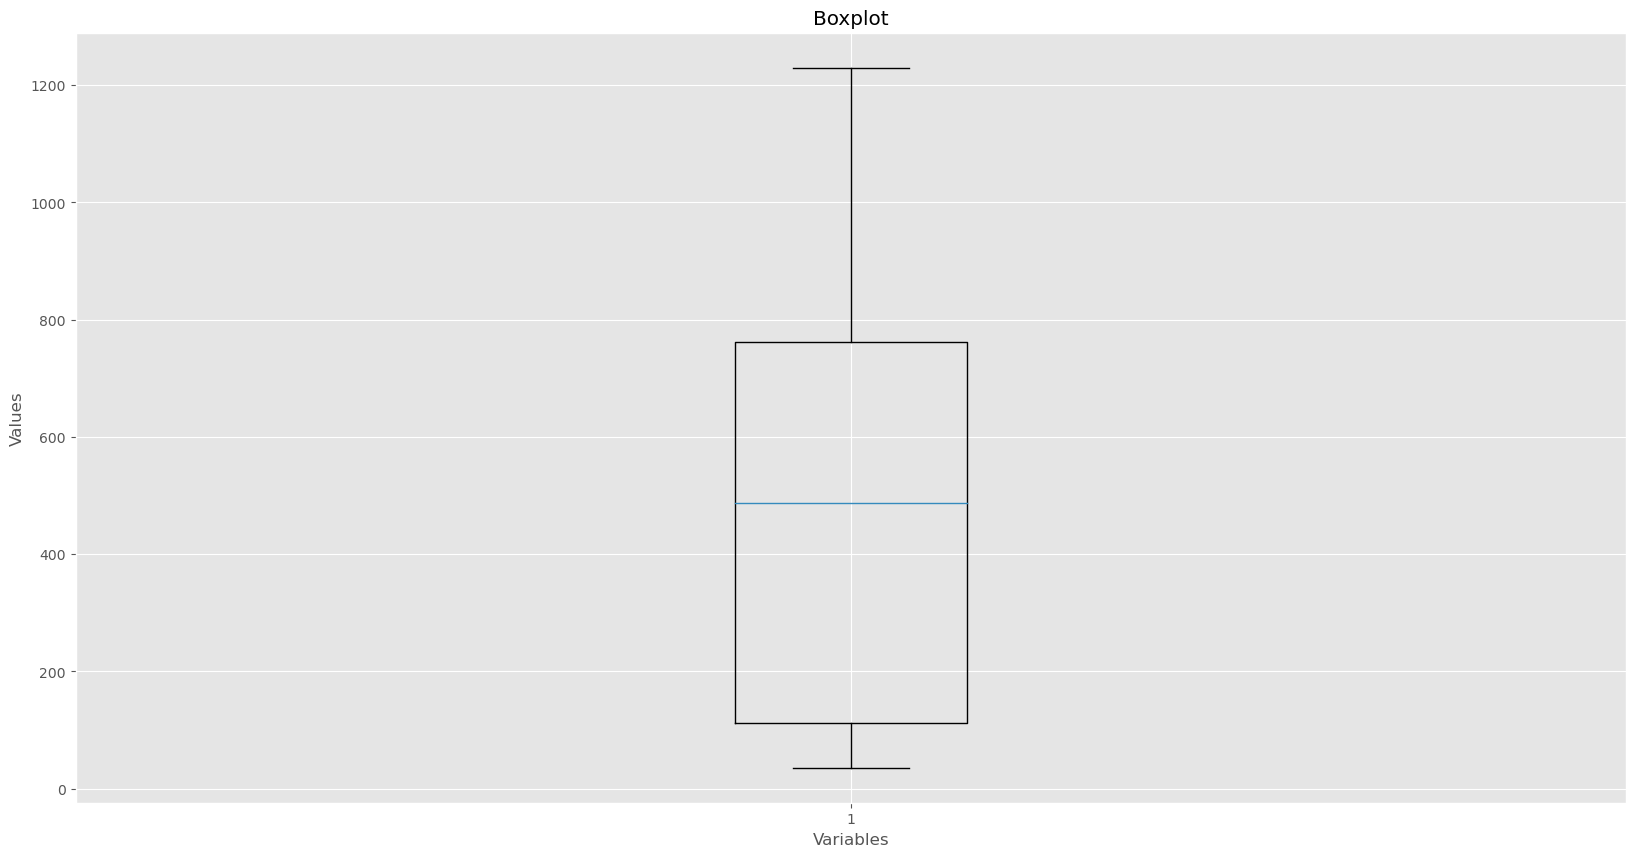

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.boxplot(stock_data["Close"])
ax.set_xlabel('Variables')
ax.set_ylabel('Values')
ax.set_title('Boxplot')
plt.show()

In [ ]:
#no outliers

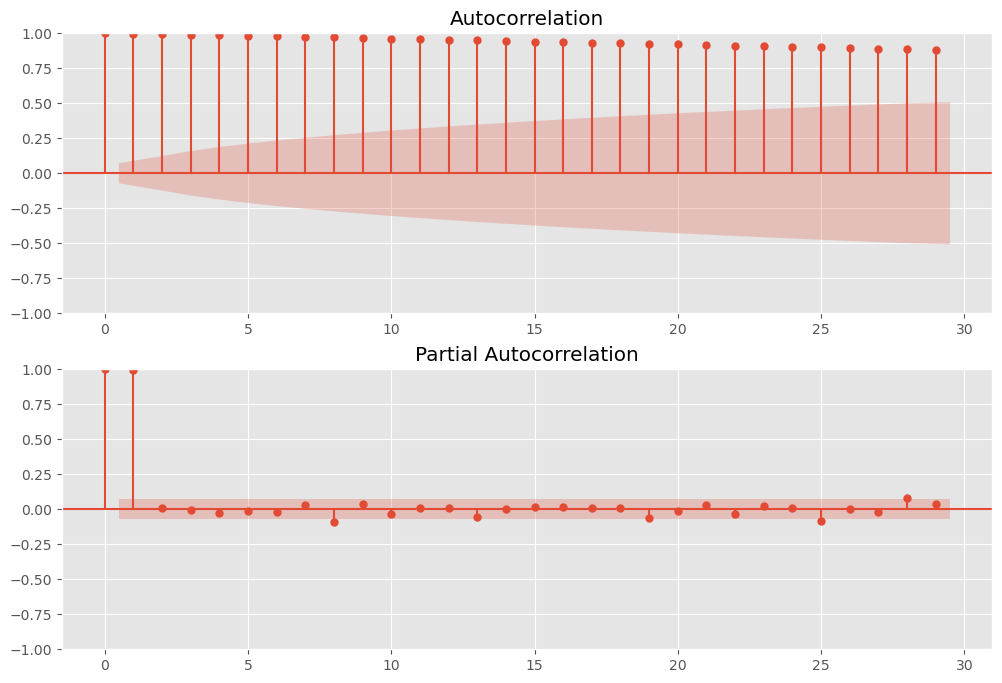

In [ ]:
#ACF/PACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize = (12, 8))
plot_acf(stock_data, ax = axes[0])
plot_pacf(stock_data, ax = axes[1])
plt.show()
#since series is non stationary, results are not good

In [ ]:
#To make time series stationary>> differencing
df_close = df_close.diff() #by default 1st order differencing, provide values for other differening
df_close = df_close.dropna()

In [ ]:
df_close

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

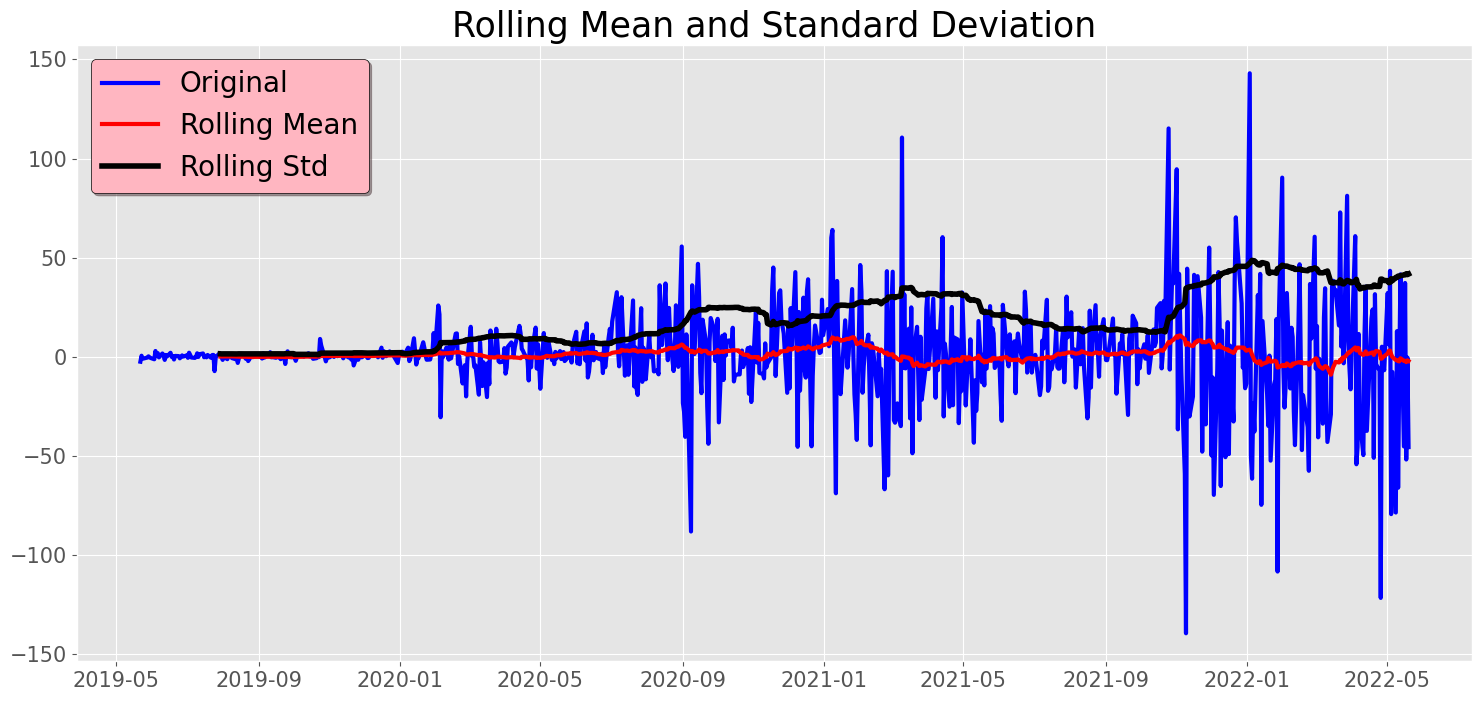

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [ ]:
#now check again the stationarity
test_stationarity(df_close)

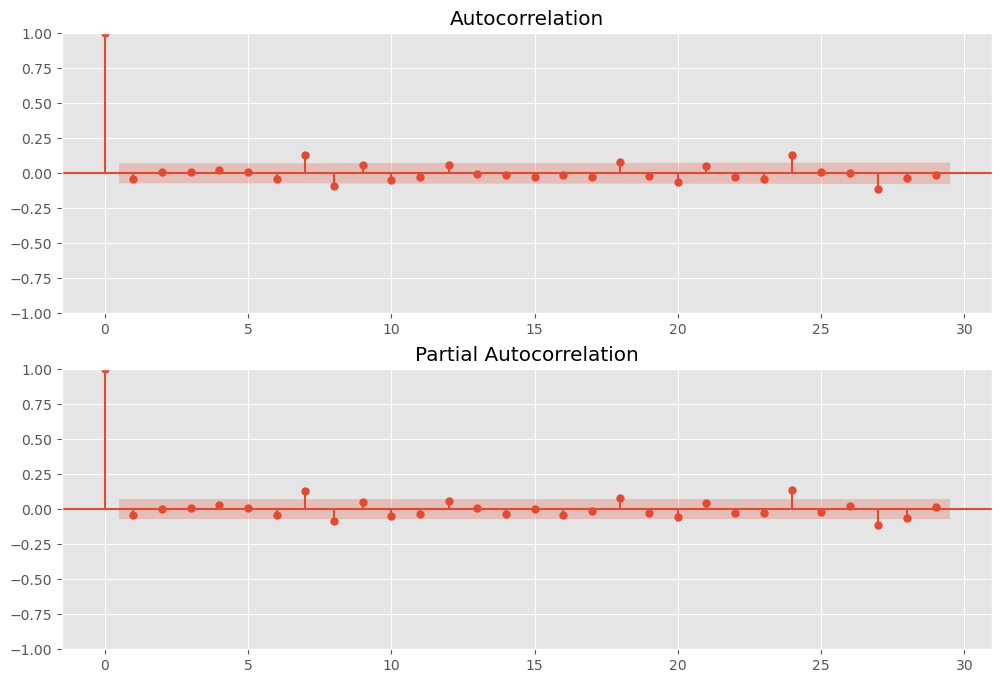

In [ ]:
#now pvalues is less than 0.05, reject the null>> time series is stationary, if not stationary, then again you need to differencing


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize = (12, 8))
plot_acf(df_close, ax = axes[0])
plot_pacf(df_close, ax = axes[1])
plt.show()

In [ ]:
#in time series data, train test split happens based on tim index
df_close

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

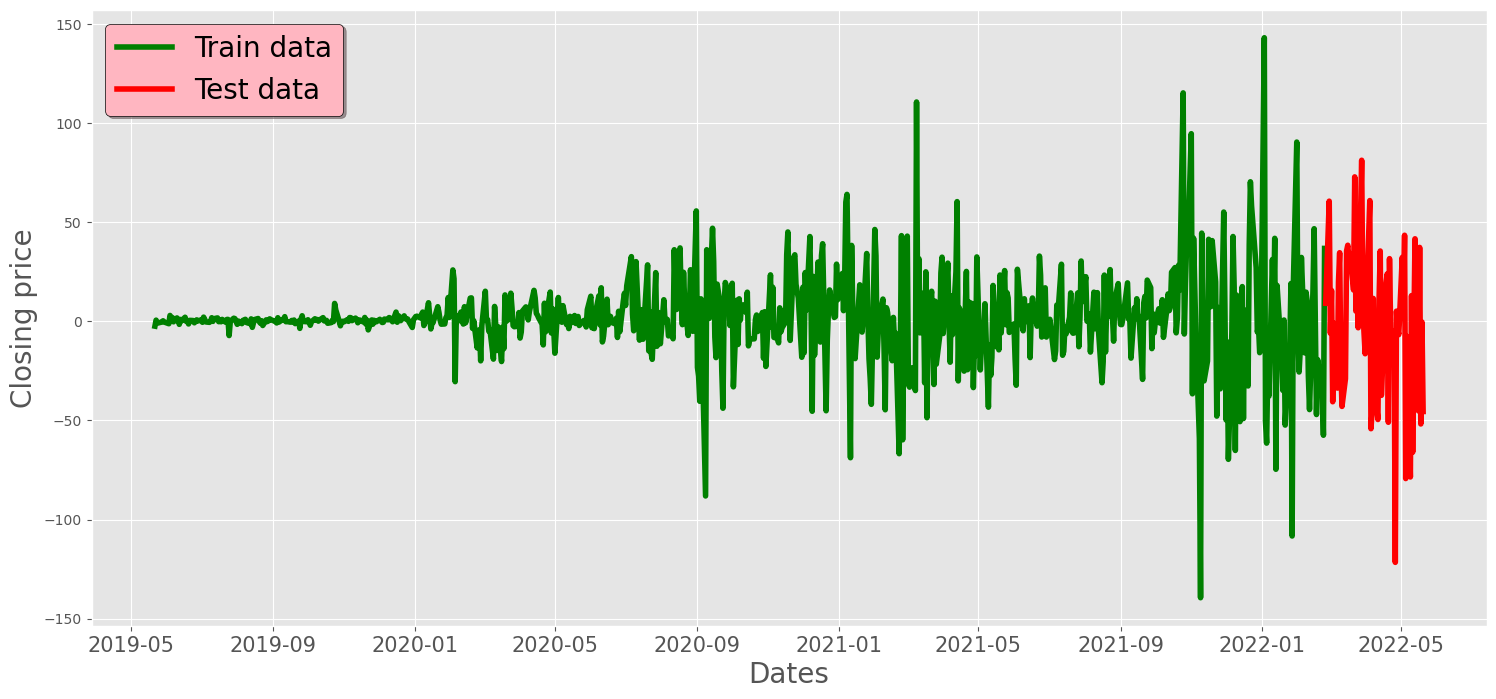

In [ ]:
train_data = df_close[0:-60]
test_data = df_close[-60:]
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing price', fontsize = 20)
plt.xticks(fontsize=15)
plt.plot(train_data, 'green', label = 'Train data', linewidth = 4)
plt.plot(test_data, 'red', label = 'Test data', linewidth = 4)
plt.legend(fontsize = 20, shadow=True, facecolor = 'lightpink', edgecolor='k')

In [ ]:
train_data.shape, test_data.shape

((697,), (60,))

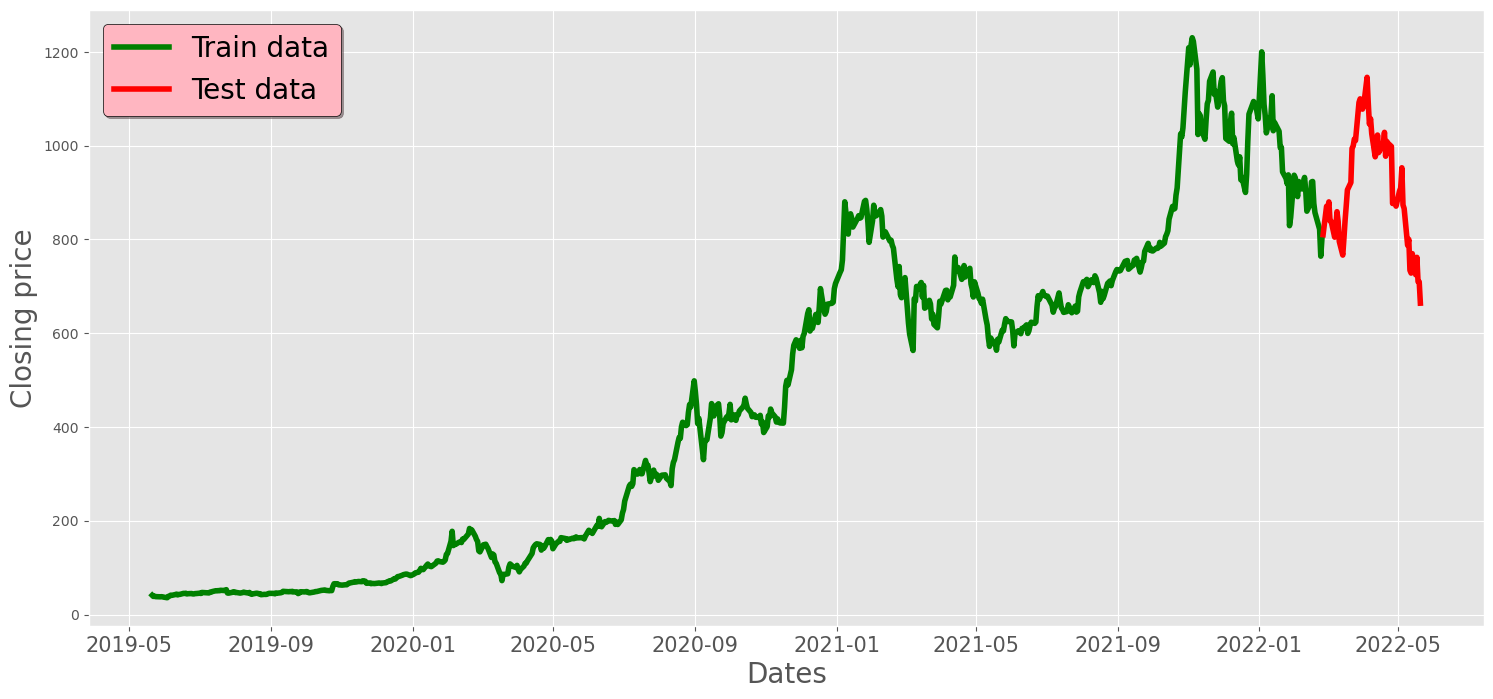

In [ ]:
#Now since we will use ARIMA, we dont need stationary time series data
#why> ARIMA itself has inherent differencing parameter, which will make the series stationary
#I>> integrated
#we will use original time series data

train_data = stock_data[0:-60]
test_data = stock_data[-60:]
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing price', fontsize = 20)
plt.xticks(fontsize=15)
plt.plot(train_data, 'green', label = 'Train data', linewidth = 4)
plt.plot(test_data, 'red', label = 'Test data', linewidth = 4)
plt.legend(fontsize = 20, shadow=True, facecolor = 'lightpink', edgecolor='k')

In [ ]:
#model building
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
train_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-02-17,876.349976
2022-02-18,856.979980
2022-02-22,821.530029


In [ ]:
history = train_data['Close']

In [ ]:
history

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-02-17    876.349976
2022-02-18    856.979980
2022-02-22    821.530029
2022-02-23    764.039978
2022-02-24    800.770020
Name: Close, Length: 698, dtype: float64

In [ ]:
model = ARIMA(history, order = (1, 1, 1))

In [ ]:
model = model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Tue, 02 Jul 2024   AIC                           6306.700
Time:                        22:50:34   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.forecast() #predict is used for a range of values

698    800.204384
dtype: float64

In [ ]:
test_data = test_data['Close']
test_data

Date
2022-02-25     809.869995
2022-02-28     870.429993
2022-03-01     864.369995
2022-03-02     879.890015
2022-03-03     839.289978
2022-03-04     838.289978
2022-03-07     804.580017
2022-03-08     824.400024
2022-03-09     858.969971
2022-03-10     838.299988
2022-03-11     795.349976
2022-03-14     766.369995
2022-03-15     801.890015
2022-03-16     840.229980
2022-03-17     871.599976
2022-03-18     905.390015
2022-03-21     921.159973
2022-03-22     993.979980
2022-03-23     999.109985
2022-03-24    1013.919983
2022-03-25    1010.640015
2022-03-28    1091.839966
2022-03-29    1099.569946
2022-03-30    1093.989990
2022-03-31    1077.599976
2022-04-01    1084.589966
2022-04-04    1145.449951
2022-04-05    1091.260010
2022-04-06    1045.760010
2022-04-07    1057.260010
2022-04-08    1025.489990
2022-04-11     975.929993
2022-04-12     986.950012
2022-04-13    1022.369995
2022-04-14     985.000000
2022-04-18    1004.289978
2022-04-19    1028.150024
2022-04-20     977.200012
2022-04

In [ ]:
mean_squared_error([test_data[0]], model.forecast())

93.42404624178532

In [ ]:
np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

9.665611529633566

In [ ]:
#we can treat p, d, q as hyperparameter
p_values = range(0, 3)
d_values =  range(0, 3)
q_values = range(0, 3)

for i in p_values:
    for j in d_values:
        for k in q_values:
            print(i, j, k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [ ]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

def evaluate_models(dataset, test, p_values, d_values, q_values):
    if isinstance(dataset, pd.DataFrame):
        dataset = dataset['Close']
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset,test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.164
ARIMA(0, 0, 2) RMSE=156.109
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.580
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.598
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.814
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.739
ARIMA(2, 2, 2) RMSE=39.732
Best ARIMA(2, 0, 0) RMSE=39.440


In [ ]:
history = [x for x in train_data['Close']]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 39.43991351904139


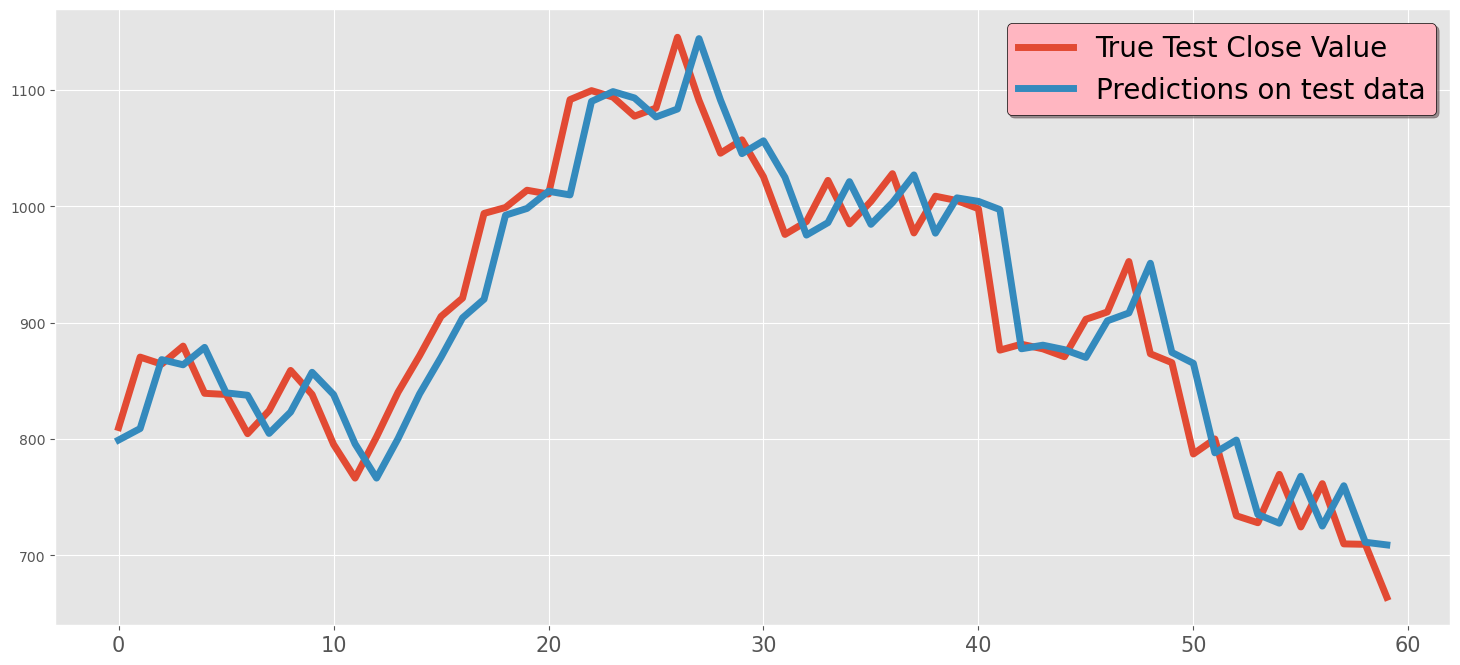

In [ ]:
plure(figsize=(18,8))
plt.grit.figd(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [ ]:
fc_series = pd.Series(predictions, index=test_data.index)

In [ ]:
fc_series

Date
2022-02-25     [799.1426172320037]
2022-02-28      [808.979295995689]
2022-03-01     [868.2636071102543]
2022-03-02     [863.8102202146815]
2022-03-03     [878.7857745084674]
2022-03-04     [839.6820005968118]
2022-03-07     [837.6330796569559]
2022-03-08     [804.8108107454833]
2022-03-09     [823.1708652997996]
2022-03-10     [857.3630316943378]
2022-03-11     [838.1984557002826]
2022-03-14     [795.7993817247655]
2022-03-15      [766.387644871172]
2022-03-16     [800.3567174690709]
2022-03-17     [838.7344215242174]
2022-03-18      [870.330557878033]
2022-03-21      [904.155515875507]
2022-03-22     [920.2061627035223]
2022-03-23     [992.4573690251066]
2022-03-24     [998.2717332019724]
2022-03-25    [1013.0300798104711]
2022-03-28     [1009.895036096912]
2022-03-29    [1090.2962135555426]
2022-03-30    [1098.7386792881675]
2022-03-31     [1093.258831152743]
2022-04-01    [1076.9429680264493]
2022-04-04    [1083.7653608066632]
2022-04-05     [1144.294115284474]
2022-04-06    [

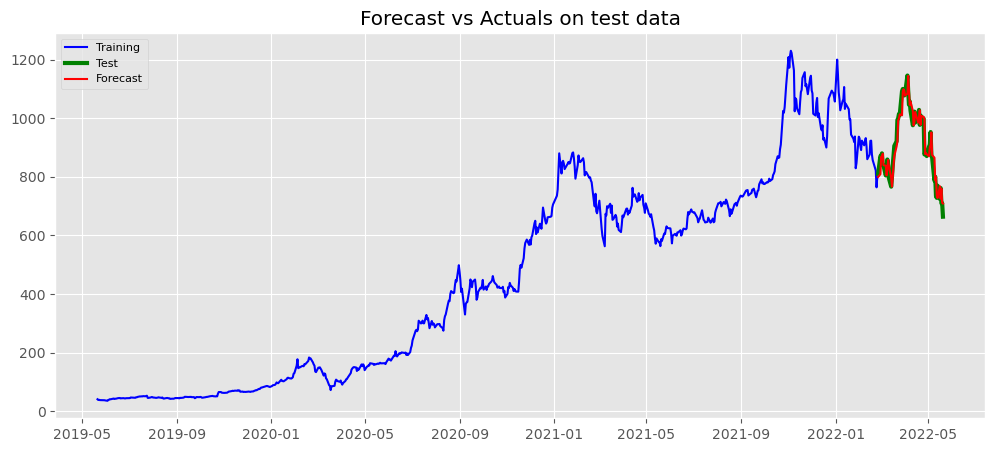

In [ ]:
#forecast value with actual test data
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data['Close'], label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

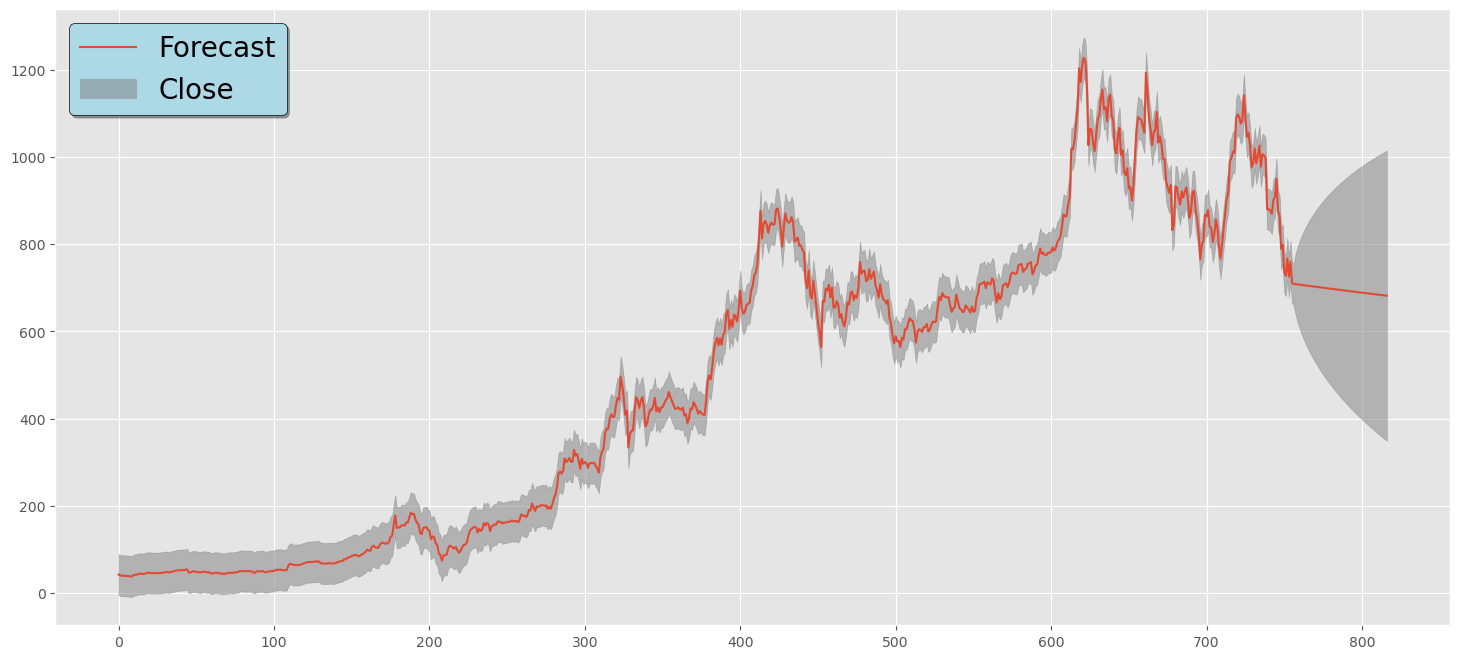

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [ ]:
#SARIMA -p, d, q, P, Q, D,s

history = [x for x in train_data['Close']]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 39.739482110748696


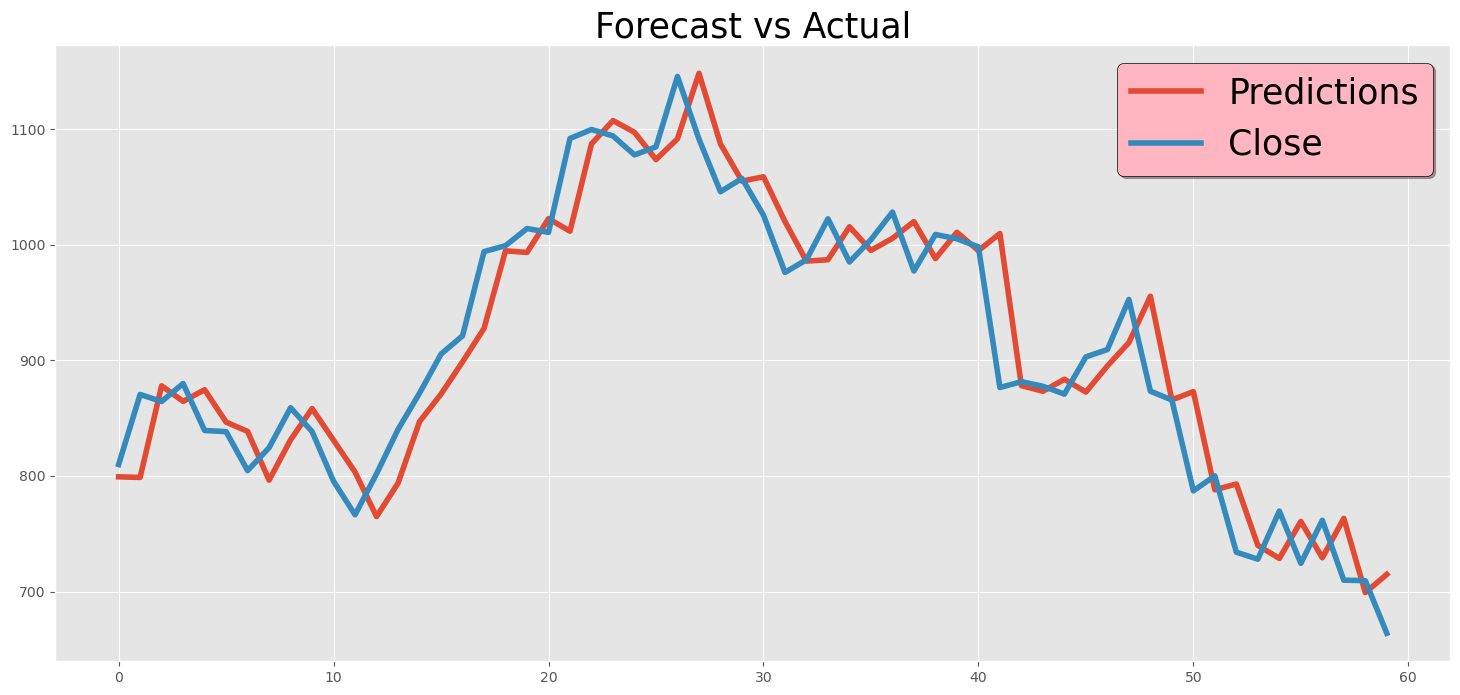

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')